# ЛР №2

## Обработка пропусков в данных, кодирование категориальных признаков, масштабирование данных.

## 1) Импорт библиотек. Загрузка и первичный анализ данных.

In [120]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline 
sns.set(style="ticks")

В качестве набора данных мы будем использовать набор данных, [содержащий информацию о погоде в городе Сегед, Венгрия за 2006 - 2016гг.](https://www.kaggle.com/budincsevity/szeged-weather)

Датасет состоит из одного файла:
'weatherHistory.csv'

In [121]:
data = pd.read_csv('data/weatherHistory.csv', sep=",")

In [122]:
# Размер датасета (строки, столбцы)
data.shape

(96453, 12)

In [123]:
# Список колонок с типами данных
data.dtypes

Formatted Date;Formatted Date     object
Summary                           object
Precip Type                       object
Temperature (C)                  float64
Apparent Temperature (C)         float64
Humidity                         float64
Wind Speed (km/h)                float64
Wind Bearing (degrees)             int64
Visibility (km)                  float64
Loud Cover                         int64
Pressure (millibars)             float64
Daily Summary                     object
dtype: object

In [124]:
# Количество пропущенных значений
data.isnull().sum()

Formatted Date;Formatted Date       0
Summary                             0
Precip Type                       517
Temperature (C)                  1679
Apparent Temperature (C)          734
Humidity                          440
Wind Speed (km/h)                1548
Wind Bearing (degrees)              0
Visibility (km)                  1147
Loud Cover                          0
Pressure (millibars)                0
Daily Summary                       0
dtype: int64

In [125]:
# Первые 5 строк датасета
data.head()

,Formatted Date;Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary
2006-04-01 00:00:00,000 +0200;2006-04-01 00:00:00.000 +0200,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251,15.8263,0,1015.13,Partly cloudy throughout the day.
2006-04-01 01:00:00,000 +0200;2006-04-01 01:00:00.000 +0200,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259,15.8263,0,1015.63,Partly cloudy throughout the day.
2006-04-01 02:00:00,000 +0200;2006-04-01 02:00:00.000 +0200,Mostly Cloudy,rain,9.377778,9.377778,0.89,3.9284,204,14.9569,0,1015.94,Partly cloudy throughout the day.
2006-04-01 03:00:00,000 +0200;2006-04-01 03:00:00.000 +0200,Partly Cloudy,rain,8.288889,5.944444,0.83,14.1036,269,15.8263,0,1016.41,Partly cloudy throughout the day.
2006-04-01 04:00:00,000 +0200;2006-04-01 04:00:00.000 +0200,Mostly Cloudy,rain,8.755556,6.977778,0.83,11.0446,259,15.8263,0,1016.51,Partly cloudy throughout the day.


In [126]:
total_count = data.shape[0]
print('Всего строк: {}'.format(total_count))

Всего строк: 96453


## 2) Обработка пропусков данных.

### Обработка пропусков в числовых данных

#### Простые стратегии - удаление

In [127]:
# Удаление колонок, содержащих пустые значения
data_new_1 = data.dropna(axis=1, how='any')
(data.shape, data_new_1.shape)

((96453, 12), (96453, 6))

In [128]:
# Удаление строк, содержащих пустые значения
data_new_2 = data.dropna(axis=0, how='any')
(data.shape, data_new_2.shape)

((96453, 12), (90388, 12))

Как видно, удаление колонок, содержащих пустые значение чревато потерей большей части необходимых данных, в то время как удаление строк, содержащих пустые значения, не принесёт серьёзного ущерба исходному набору данных.

#### "Внедрение значений" - импьютация (imputation)

In [129]:
# Выберем числовые колонки с пропущенными значениями
# Цикл по колонкам датасета
num_cols = []
for col in data.columns:
    # Количество пустых значений 
    temp_null_count = data[data[col].isnull()].shape[0]
    dt = str(data[col].dtype)
    if temp_null_count>0 and (dt=='float64' or dt=='int64'):
        num_cols.append(col)
        temp_perc = round((temp_null_count / total_count) * 100.0, 2)
        print('Колонка {}. Тип данных {}. Количество пустых значений {}, {}%.'.format(col, dt, temp_null_count, temp_perc))

Колонка Temperature (C). Тип данных float64. Количество пустых значений 1679, 1.74%.
Колонка Apparent Temperature (C). Тип данных float64. Количество пустых значений 734, 0.76%.
Колонка Humidity. Тип данных float64. Количество пустых значений 440, 0.46%.
Колонка Wind Speed (km/h). Тип данных float64. Количество пустых значений 1548, 1.6%.
Колонка Visibility (km). Тип данных float64. Количество пустых значений 1147, 1.19%.


In [130]:
# Фильтр по колонкам с пропущенными значениями
data_num = data[num_cols]
data_num

,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Visibility (km)
2006-04-01 00:00:00,9.472222,7.388889,0.89,14.1197,15.8263
2006-04-01 01:00:00,9.355556,7.227778,0.86,14.2646,15.8263
2006-04-01 02:00:00,9.377778,9.377778,0.89,3.9284,14.9569
2006-04-01 03:00:00,8.288889,5.944444,0.83,14.1036,15.8263
2006-04-01 04:00:00,8.755556,6.977778,0.83,11.0446,15.8263
...,...,...,...,...,...
2016-09-09 19:00:00,26.016667,26.016667,0.43,10.9963,16.1000
2016-09-09 20:00:00,24.583333,24.583333,0.48,10.0947,15.5526
2016-09-09 21:00:00,22.038889,22.038889,0.56,8.9838,16.1000
2016-09-09 22:00:00,21.522222,21.522222,0.60,10.5294,16.1000


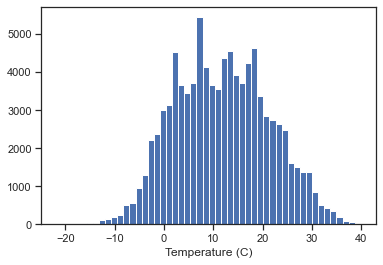

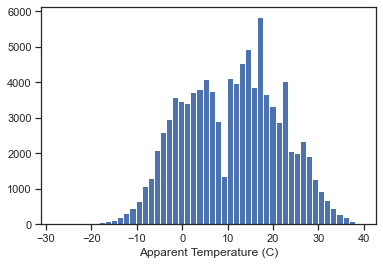

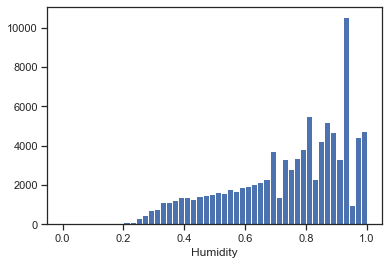

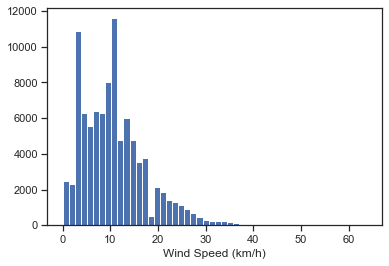

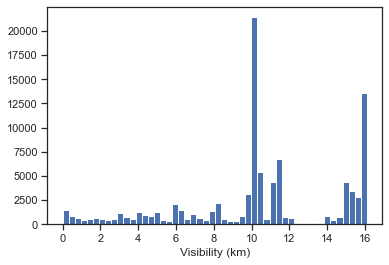

In [131]:
# Гистограмма по признакам
for col in data_num:
    plt.hist(data[col], 50)
    plt.xlabel(col)
    plt.show()

Как видно из представленных гистограмм, для Temperature и Wind Speed лучше всего использовать мод в качестве значения при заполнении пропусков, а для остальные - среднее значение.

In [132]:
from sklearn.impute import SimpleImputer
from sklearn.impute import MissingIndicator

In [133]:
# Более сложная функция, которая позволяет задавать колонку и вид импьютации
def test_num_impute_col(dataset, column, strategy_param):
    
    indicator = MissingIndicator()
    mask_missing_values_only = indicator.fit_transform(dataset[[column]])
    
    imp_num = SimpleImputer(strategy=strategy_param)
    data_num_imp = imp_num.fit_transform(dataset[[column]])
    
    dataset[column] = data_num_imp
    filled_data = data_num_imp[mask_missing_values_only]
    
    return column, strategy_param, filled_data.size, filled_data[0], filled_data[filled_data.size-1]

In [134]:
data[['Temperature (C)']].describe()

,Temperature (C)
count,94774.000000
mean,11.809033
std,9.514404
min,-21.822222
25%,4.477778
50%,11.666667
75%,18.761111
max,39.905556


In [135]:
test_num_impute_col(data, 'Temperature (C)', 'most_frequent')

('Temperature (C)', 'most_frequent', 1679, 7.22222222222222, 7.22222222222222)

In [136]:
data[['Wind Speed (km/h)']].describe()

,Wind Speed (km/h)
count,94905.000000
mean,10.825055
std,6.917948
min,0.000000
25%,5.860400
50%,9.998100
75%,14.135800
max,63.852600


In [137]:
test_num_impute_col(data, 'Wind Speed (km/h)', 'most_frequent')

('Wind Speed (km/h)', 'most_frequent', 1548, 3.22, 3.22)

In [138]:
data[['Apparent Temperature (C)']].describe()

,Apparent Temperature (C)
count,95719.000000
mean,10.846699
std,10.723341
min,-27.716667
25%,2.261111
50%,11.994444
75%,18.844444
max,39.344444


In [139]:
test_num_impute_col(data, 'Apparent Temperature (C)', 'mean')

('Apparent Temperature (C)',
 'mean',
 734,
 10.846699076347292,
 10.846699076347292)

In [140]:
data[['Humidity']].describe()

,Humidity
count,96013.000000
mean,0.735089
std,0.195544
min,0.000000
25%,0.600000
50%,0.780000
75%,0.890000
max,1.000000


In [141]:
test_num_impute_col(data, 'Humidity', 'mean')

('Humidity', 'mean', 440, 0.7350886859071166, 0.7350886859071166)

In [142]:
data[['Visibility (km)']].describe()

,Visibility (km)
count,95306.000000
mean,10.376568
std,4.181314
min,0.000000
25%,8.420300
50%,10.046400
75%,14.876400
max,16.100000


In [143]:
test_num_impute_col(data, 'Visibility (km)', 'mean')

('Visibility (km)', 'mean', 1147, 10.376567743898601, 10.376567743898601)

In [144]:
# Количество пропущенных значений
data.isnull().sum()

Formatted Date;Formatted Date      0
Summary                            0
Precip Type                      517
Temperature (C)                    0
Apparent Temperature (C)           0
Humidity                           0
Wind Speed (km/h)                  0
Wind Bearing (degrees)             0
Visibility (km)                    0
Loud Cover                         0
Pressure (millibars)               0
Daily Summary                      0
dtype: int64

### Обработка пропусков в категориальных данных

In [145]:
# Выберем категориальные колонки с пропущенными значениями
# Цикл по колонкам датасета
cat_cols = []
for col in data.columns:
    # Количество пустых значений 
    temp_null_count = data[data[col].isnull()].shape[0]
    dt = str(data[col].dtype)
    if temp_null_count>0 and (dt=='object'):
        cat_cols.append(col)
        temp_perc = round((temp_null_count / total_count) * 100.0, 2)
        print('Колонка {}. Тип данных {}. Количество пустых значений {}, {}%.'.format(col, dt, temp_null_count, temp_perc))

Колонка Precip Type. Тип данных object. Количество пустых значений 517, 0.54%.


#### Простые стратегии - удаление

In [146]:
# Удаление строк, содержащих пустые значения
data_new_3 = data.dropna(axis=0, how='any', subset=['Precip Type'])
(data.shape, data_new_3.shape)

((96453, 12), (95936, 12))

#### "Внедрение значений" - импьютация (imputation)

In [147]:
data[data['Precip Type'].isnull()].shape

(517, 12)

In [148]:
# Ищем самые применяемые значения для данного атрибута
data['Precip Type'].value_counts()

rain    85224
snow    10712
Name: Precip Type, dtype: int64

In [149]:
imp = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
data['Precip Type'] = imp.fit_transform(data[['Precip Type']])

In [150]:
data['Precip Type'].value_counts()

rain    85741
snow    10712
Name: Precip Type, dtype: int64

In [151]:
data.isnull().sum()

Formatted Date;Formatted Date    0
Summary                          0
Precip Type                      0
Temperature (C)                  0
Apparent Temperature (C)         0
Humidity                         0
Wind Speed (km/h)                0
Wind Bearing (degrees)           0
Visibility (km)                  0
Loud Cover                       0
Pressure (millibars)             0
Daily Summary                    0
dtype: int64

## 3) Преобразование категориальных признаков в числовые.

In [160]:
data['Precip Type'].unique()

array(['rain', 'snow'], dtype=object)

In [161]:
print(f"Количество уникальных записей атрибута 'Precip Type' = {data['Precip Type'].nunique()} из {data.shape[0]}")

Количество уникальных записей атрибута 'Precip Type' = 2 из 96453


In [158]:
data['Summary'].unique()

array(['Partly Cloudy', 'Mostly Cloudy', 'Overcast', 'Foggy',
       'Breezy and Mostly Cloudy', 'Clear', 'Breezy and Partly Cloudy',
       'Breezy and Overcast', 'Humid and Mostly Cloudy',
       'Humid and Partly Cloudy', 'Windy and Foggy', 'Windy and Overcast',
       'Breezy and Foggy', 'Windy and Partly Cloudy', 'Breezy',
       'Dry and Partly Cloudy', 'Windy and Mostly Cloudy',
       'Dangerously Windy and Partly Cloudy', 'Dry', 'Windy',
       'Humid and Overcast', 'Light Rain', 'Drizzle', 'Windy and Dry',
       'Dry and Mostly Cloudy', 'Breezy and Dry', 'Rain'], dtype=object)

In [159]:
print(f"Количество уникальных записей атрибута 'Summary' = {data['Summary'].nunique()} из {data.shape[0]}")

Количество уникальных записей атрибута 'Summary' = 27 из 96453


In [157]:
data['Daily Summary'].unique()

array(['Partly cloudy throughout the day.',
       'Mostly cloudy throughout the day.', 'Foggy in the evening.',
       'Foggy overnight and breezy in the morning.',
       'Overcast throughout the day.', 'Partly cloudy until night.',
       'Mostly cloudy until night.',
       'Foggy starting overnight continuing until morning.',
       'Foggy in the morning.', 'Partly cloudy until evening.',
       'Partly cloudy starting in the morning.',
       'Mostly cloudy starting overnight continuing until night.',
       'Mostly cloudy until evening.',
       'Partly cloudy starting in the morning continuing until evening.',
       'Partly cloudy starting in the afternoon.',
       'Partly cloudy starting overnight.',
       'Partly cloudy until morning.',
       'Partly cloudy starting overnight continuing until night.',
       'Partly cloudy starting in the afternoon continuing until night.',
       'Mostly cloudy starting overnight.',
       'Partly cloudy until afternoon.',
       'Mostly

In [163]:
print(f"Количество уникальных записей атрибута 'Daily Summary' = {data['Daily Summary'].nunique()} из {data.shape[0]}")

Количество уникальных записей атрибута 'Daily Summary' = 214 из 96453


In [164]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

Кодируем атрибут 'Daily Summary' целочисленными значениями

In [165]:
le = LabelEncoder()
data['Daily Summary'] = le.fit_transform(data['Daily Summary'])

In [166]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 96453 entries, 2006-04-01 00:00:00 to 2016-09-09 23:00:00
Data columns (total 12 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Formatted Date;Formatted Date  96453 non-null  object 
 1   Summary                        96453 non-null  object 
 2   Precip Type                    96453 non-null  object 
 3   Temperature (C)                96453 non-null  float64
 4   Apparent Temperature (C)       96453 non-null  float64
 5   Humidity                       96453 non-null  float64
 6   Wind Speed (km/h)              96453 non-null  float64
 7   Wind Bearing (degrees)         96453 non-null  int64  
 8   Visibility (km)                96453 non-null  float64
 9   Loud Cover                     96453 non-null  int64  
 10  Pressure (millibars)           96453 non-null  float64
 11  Daily Summary                  96453 non-null  int32  
dtypes: float64(6), int3

Кодируем атрибут 'Summary' целочисленными значениями

In [168]:
le = LabelEncoder()
data['Summary'] = le.fit_transform(data['Summary'])

In [170]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 96453 entries, 2006-04-01 00:00:00 to 2016-09-09 23:00:00
Data columns (total 12 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Formatted Date;Formatted Date  96453 non-null  object 
 1   Summary                        96453 non-null  int32  
 2   Precip Type                    96453 non-null  object 
 3   Temperature (C)                96453 non-null  float64
 4   Apparent Temperature (C)       96453 non-null  float64
 5   Humidity                       96453 non-null  float64
 6   Wind Speed (km/h)              96453 non-null  float64
 7   Wind Bearing (degrees)         96453 non-null  int64  
 8   Visibility (km)                96453 non-null  float64
 9   Loud Cover                     96453 non-null  int64  
 10  Pressure (millibars)           96453 non-null  float64
 11  Daily Summary                  96453 non-null  int32  
dtypes: float64(6), int3

Кодируем атрибут 'Precip Type' быстрым one-hot кодированием

In [171]:
# кодирование категорий one-hot encoding
pd.get_dummies(data, columns = ['Precip Type'])

,Formatted Date;Formatted Date,Summary,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary,Precip Type_rain,Precip Type_snow
2006-04-01 00:00:00,000 +0200;2006-04-01 00:00:00.000 +0200,19,9.472222,7.388889,0.89,14.1197,251,15.8263,0,1015.13,197,1,0
2006-04-01 01:00:00,000 +0200;2006-04-01 01:00:00.000 +0200,19,9.355556,7.227778,0.86,14.2646,259,15.8263,0,1015.63,197,1,0
2006-04-01 02:00:00,000 +0200;2006-04-01 02:00:00.000 +0200,17,9.377778,9.377778,0.89,3.9284,204,14.9569,0,1015.94,197,1,0
2006-04-01 03:00:00,000 +0200;2006-04-01 03:00:00.000 +0200,19,8.288889,5.944444,0.83,14.1036,269,15.8263,0,1016.41,197,1,0
2006-04-01 04:00:00,000 +0200;2006-04-01 04:00:00.000 +0200,17,8.755556,6.977778,0.83,11.0446,259,15.8263,0,1016.51,197,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2016-09-09 19:00:00,000 +0200;2016-09-09 19:00:00.000 +0200,19,26.016667,26.016667,0.43,10.9963,31,16.1000,0,1014.36,170,1,0
2016-09-09 20:00:00,000 +0200;2016-09-09 20:00:00.000 +0200,19,24.583333,24.583333,0.48,10.0947,20,15.5526,0,1015.16,170,1,0
2016-09-09 21:00:00,000 +0200;2016-09-09 21:00:00.000 +0200,19,22.038889,22.038889,0.56,8.9838,30,16.1000,0,1015.66,170,1,0
2016-09-09 22:00:00,000 +0200;2016-09-09 22:00:00.000 +0200,19,21.522222,21.522222,0.60,10.5294,20,16.1000,0,1015.95,170,1,0


## 4) Масштабирование данных.

In [172]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler, Normalizer

### MinMax масштабирование

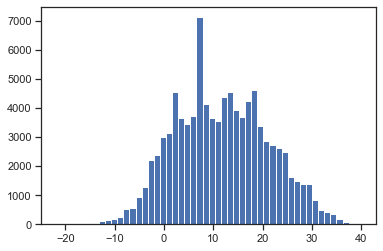

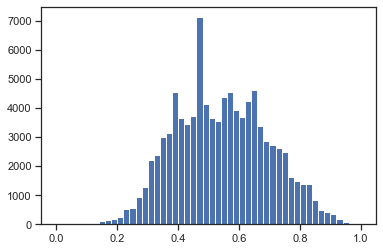

In [174]:
plt.hist(data['Temperature (C)'], 50)
plt.show()

plt.hist(MinMaxScaler().fit_transform(data[['Temperature (C)']]), 50)
plt.show()

### Масштабирование данных на основе Z-оценки - StandardScaler

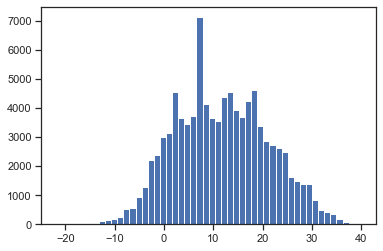

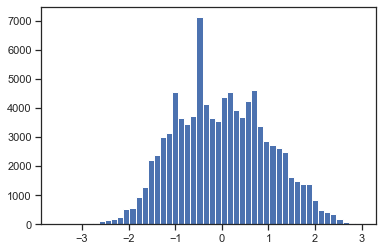

In [175]:
plt.hist(data['Temperature (C)'], 50)
plt.show()

plt.hist(StandardScaler().fit_transform(data[['Temperature (C)']]), 50)
plt.show()